/var/folders/x0/p9r3gbrs33d9yxhd4qd6kdyh0000gn/T/ipykernel_41579/153295531.py:12: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  ev_data_hourly = ev_data.resample('H', on='Time').mean()
/var/folders/x0/p9r3gbrs33d9yxhd4qd6kdyh0000gn/T/ipykernel_41579/153295531.py:15: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  ev_data_hourly_adjusted = ev_data_hourly.applymap(lambda x: 6600 if x > 0 else 0)


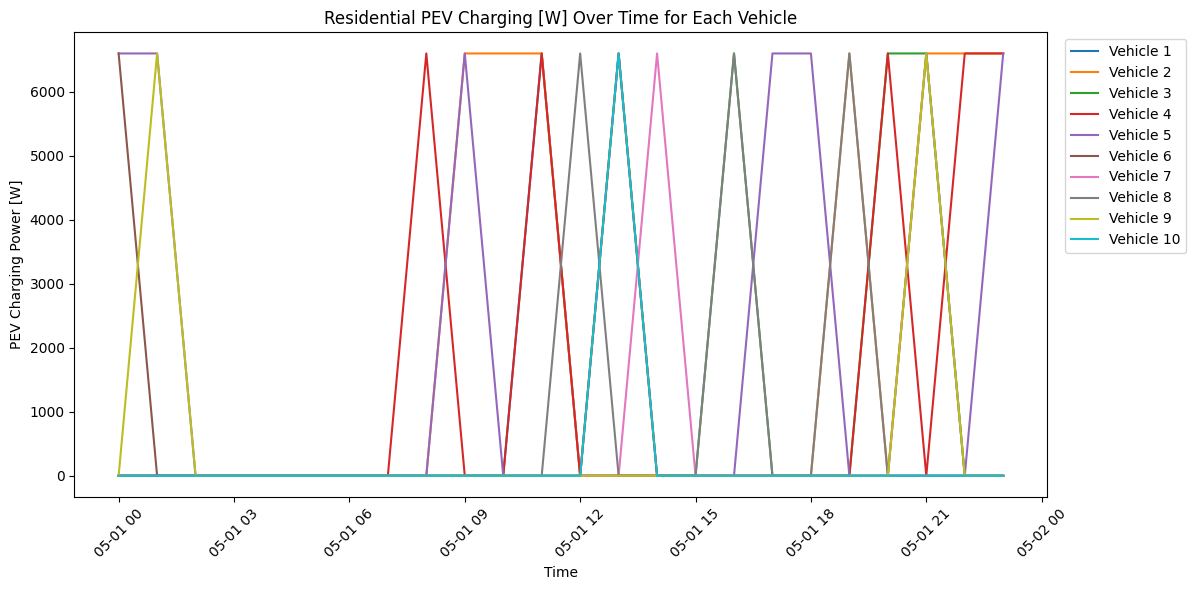

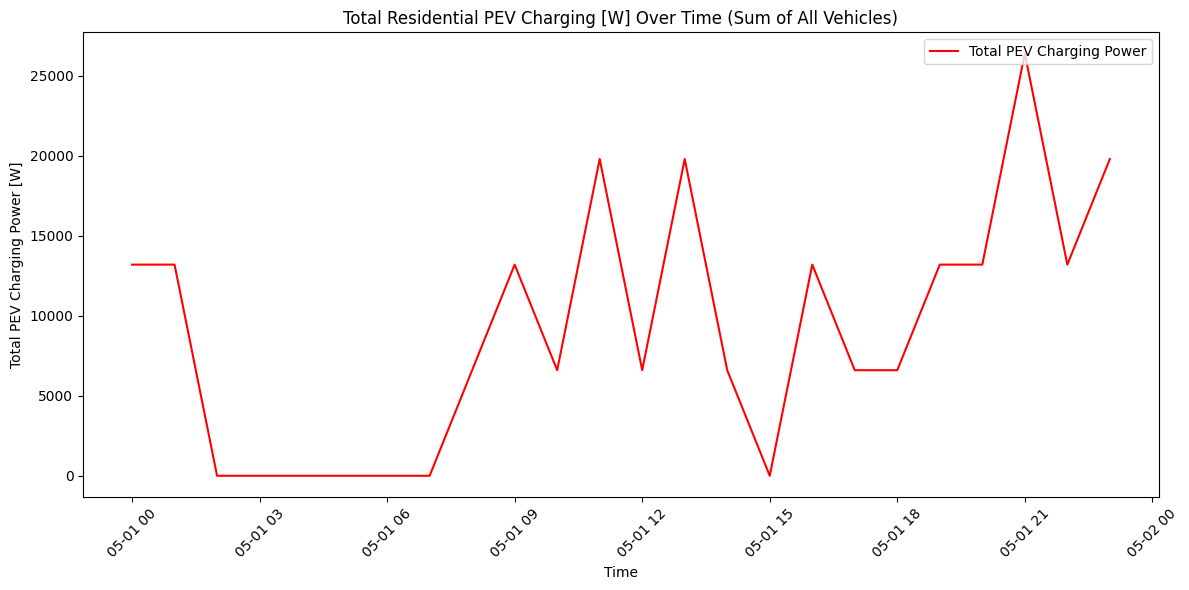

In [20]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the Excel file
file_path = 'EV2.xlsx'
ev_data = pd.read_excel(file_path)

# Convert the 'Time' column to datetime format
ev_data['Time'] = pd.to_datetime(ev_data['Time'])

# Resample data to hourly average for each vehicle
ev_data_hourly = ev_data.resample('H', on='Time').mean()

# Apply the condition: if average power > 0, set to 6600; else set to 0 for each vehicle
ev_data_hourly_adjusted = ev_data_hourly.applymap(lambda x: 6600 if x > 0 else 0)

# Plot the adjusted results for each vehicle
plt.figure(figsize=(12, 6))

for column in ev_data_hourly_adjusted.columns:
    plt.plot(ev_data_hourly_adjusted.index, ev_data_hourly_adjusted[column], label=column)

plt.title('Residential PEV Charging [W] Over Time for Each Vehicle')
plt.xlabel('Time')
plt.ylabel('PEV Charging Power [W]')
plt.legend(loc='upper right', bbox_to_anchor=(1.15, 1))
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Create a new figure for summing up all the vehicle data
plt.figure(figsize=(12, 6))

# Sum up the power for 10 vehicles at each time point
ev_data_hourly_adjusted['Total'] = ev_data_hourly_adjusted.sum(axis=1)

# Plot the total PEV charging power over time
plt.plot(ev_data_hourly_adjusted.index, ev_data_hourly_adjusted['Total'], label='Total PEV Charging Power', color='red')

plt.title('Total Residential PEV Charging [W] Over Time (Sum of All Vehicles)')
plt.xlabel('Time')
plt.ylabel('Total PEV Charging Power [W]')
plt.legend(loc='upper right')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


/var/folders/x0/p9r3gbrs33d9yxhd4qd6kdyh0000gn/T/ipykernel_41579/2585158140.py:12: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  ev_data_hourly = ev_data.resample('H', on='Time').mean()
/var/folders/x0/p9r3gbrs33d9yxhd4qd6kdyh0000gn/T/ipykernel_41579/2585158140.py:15: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  ev_data_hourly_adjusted = ev_data_hourly.applymap(lambda x: 0 if x < 3300 else 6600)


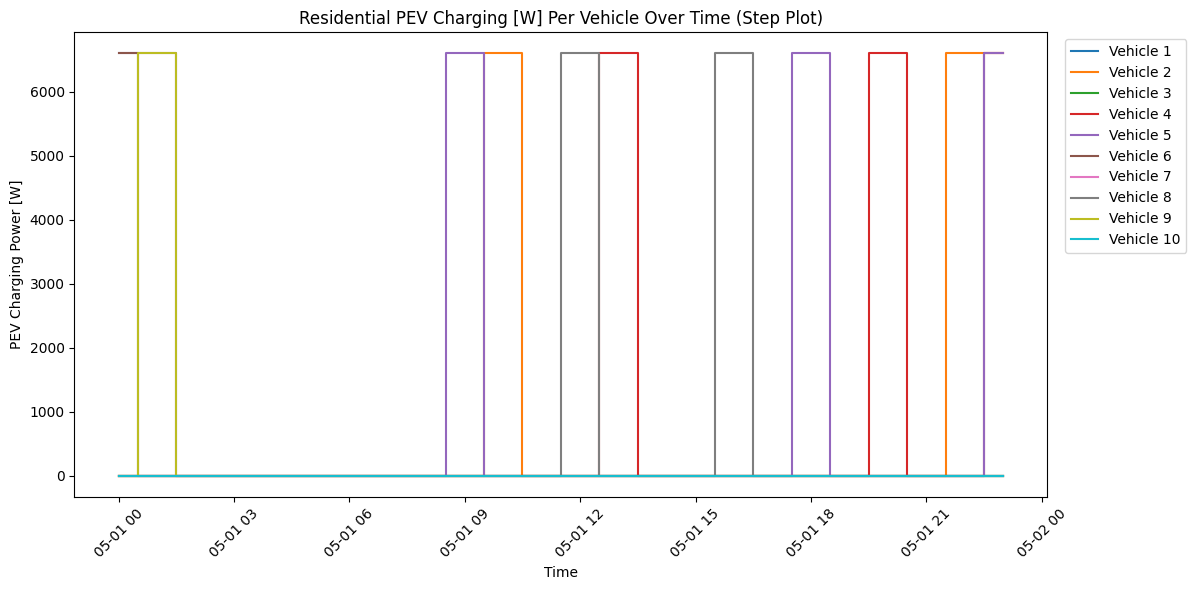

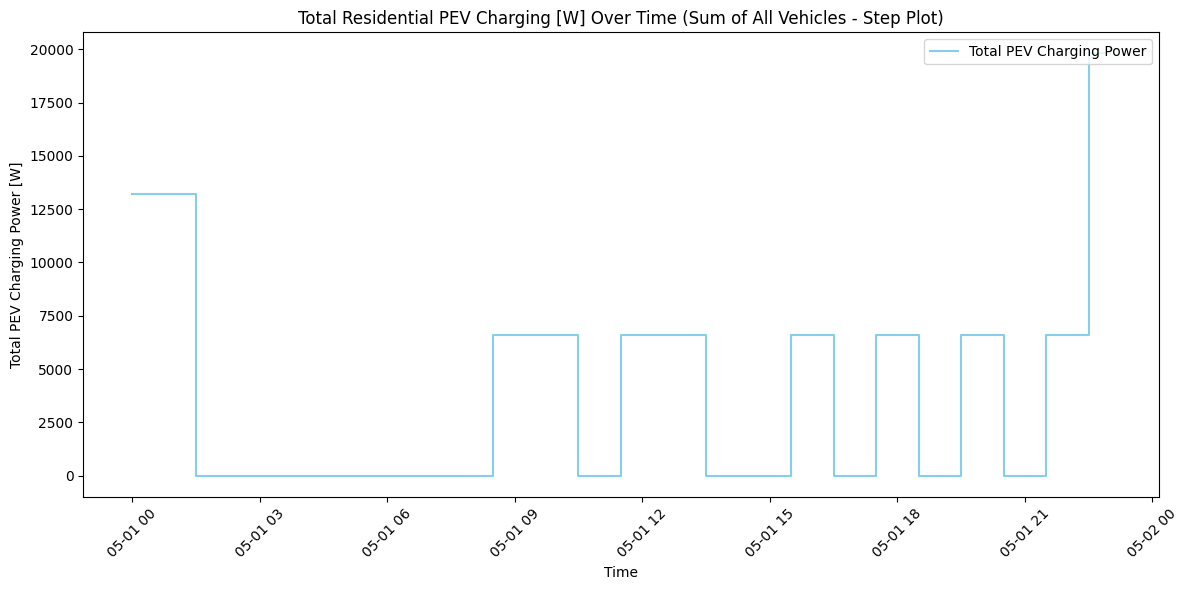

Array of total PEV charging values for 24 hours:
[13200 13200     0     0     0     0     0     0     0  6600  6600     0
  6600  6600     0     0  6600     0  6600     0  6600     0  6600 19800]


In [21]:
import pandas as pd
import matplotlib.pyplot as plt

# 1. Load the data
file_path = 'EV2.xlsx'  
ev_data = pd.read_excel(file_path)

# 2. Convert the 'Time' column to datetime format
ev_data['Time'] = pd.to_datetime(ev_data['Time'])

# 3. Resample data to hourly average for each vehicle
ev_data_hourly = ev_data.resample('H', on='Time').mean()

# 4. Apply the condition: if the average power < 3300, set to 0; else set to 6600
ev_data_hourly_adjusted = ev_data_hourly.applymap(lambda x: 0 if x < 3300 else 6600)

# 5. Plot step graphs for each vehicle
plt.figure(figsize=(12, 6))

for column in ev_data_hourly_adjusted.columns:
    plt.step(ev_data_hourly_adjusted.index, ev_data_hourly_adjusted[column], label=column, where='mid')

plt.title('Residential PEV Charging [W] Per Vehicle Over Time (Step Plot)')
plt.xlabel('Time')
plt.ylabel('PEV Charging Power [W]')
plt.xticks(rotation=45)
plt.legend(loc='upper right', bbox_to_anchor=(1.15, 1))
plt.tight_layout()
plt.show()

# 6. Calculate and plot the sum of all vehicles
ev_data_hourly_adjusted['Total'] = ev_data_hourly_adjusted.sum(axis=1)

plt.figure(figsize=(12, 6))
plt.step(ev_data_hourly_adjusted.index, ev_data_hourly_adjusted['Total'], color='skyblue', label='Total PEV Charging Power', where='mid')

plt.title('Total Residential PEV Charging [W] Over Time (Sum of All Vehicles - Step Plot)')
plt.xlabel('Time')
plt.ylabel('Total PEV Charging Power [W]')
plt.xticks(rotation=45)
plt.legend(loc='upper right')
plt.tight_layout()
plt.show()

# 7. Create an array of 24 summed values (Total PEV charging power for each hour)
total_charging_values = ev_data_hourly_adjusted['Total'].values

# Output the array of summed values
print("Array of total PEV charging values for 24 hours:")
print(total_charging_values)
